In [2]:
%matplotlib inline

In [3]:
from scipy import stats

import scipy as sp
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

# 랜덤 값 추출
* 정규분포(가우시안분포)에서 100개의 랜덤 값 추출

In [ ]:
s = sp.randn(100) 

# numpy 함수 사용

In [11]:
print("Mean: {0:.6f}".format(s.mean()))
print("Min: {0:.6f}".format(s.min()))
print("Max: {0:.6f}".format(s.max()))
print("Variance : {0:.6f}".format(s.var()))
print("Std. deviation : {0:.6f}".format(s.std()))

Mean: -0.058692
Min: -3.390240
Max: 3.290234
Variance : 1.331151
Std. deviation : 1.153755


# (참고) 출력 포맷팅 
%를 쓰는 방법과 format을 쓰는 방법
* https://goo.gl/LhT97E C언어 스타일의 포맷팅
* https://goo.gl/Zza91k 파이썬 스타일의 포맷팅

In [12]:
print("Min: %8.6f, Max: %.6f" %  (s.min(), s.max()) )

Min: -3.390240, Max: 3.290234


# scipy 함수 사용

In [13]:
print("Mean : {0:.6f}".format(sp.mean(s)))
print("Variance : {0:.6f}".format(sp.var(s)))
print("Std. deviation : {0:.6f}".format(sp.std(s)))
print("Median : {0:.6f}".format(sp.median(s)))

Mean : -0.058692
Variance : 1.331151
Std. deviation : 1.153755
Median : 0.120629


# Unbiased variance (불편분산)

In [17]:
print("Population variance = {0:8.6f}".format(sp.var(s)))
print("Sample variance = {0:8.6f}".format(sp.var(s,ddof=1)))  # unbiased variance

Population variance = 1.331151
Sample variance = 1.344597


In [23]:
from scipy import stats

stats.describe(s)

(100,
 (-3.39024036026548, 3.2902338758334406),
 -0.058691853480778648,
 1.3445967321119772,
 -0.037735168498288306,
 0.31244736582057264)

In [26]:
n, min_max, mean, var, skew, kurt = stats.describe(s)

In [27]:
print("n : {0:d}".format(n))
print("Min: {0:.6f}, Max: {1:.6f}".format(min_max[0], min_max[1]))
print("Mean: {0:8.6f}".format(mean))
print("Var: {0:8.6f}".format(var))
print("Skew : {0:8.6f}".format(skew))
print("Kurt: {0:8.6f}".format(kurt))

n : 100
Min: -3.390240, Max: 3.290234
Mean: -0.058692
Var: 1.344597
Skew : -0.037735
Kurt: 0.312447


# Probability distributions

Scipy 의 주요 확률분포 패키지

이산확률분포 discrete probability
* binom : 이항분포 binomial
* poisson : 포아송분포 Poisson

연속확률분포 continuous probability distributions
* norm : 정규분포 (Normal 혹은 Gaussian)
* chi2 : 카이제곱분포 Chi-squared
* t : t분포 Student’s T
* uniform : 균등분포 Uniform

주요 함수
* mode : Modal value
* moment : central moment
* describe: descriptive statistics
* histogram: histogram of data


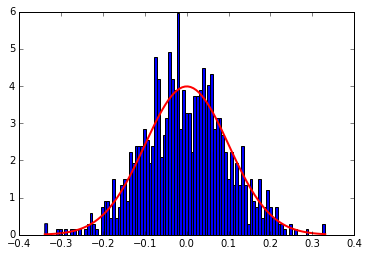

In [28]:
mu, sigma = 0, 0.1 # 평균, 표준편차
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, normed=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

In [29]:
s.min(), s.max()

(-0.33937685366393705, 0.33085431933806803)

## 확률분포 함수 활용
1. 분포객체를 생성하고, 랜덤 값을 얻는다
1. 분포모델에 인자를 전달하여 랜덤 값을 얻는다 

In [30]:
# 평균이 3.5, 표준편차가 2.0인 정규분포를 생성. 정규분포에서 loc=mean, scale=SD
# 이 분포에서 랜덤값을 얻는다

n = stats.norm(loc=3.5, scale=2.0)
n.rvs()

6.828876715313333

In [31]:
stats.norm.rvs(loc=3.5, scale=2.0)

-2.404196029740045

# 도움말
* help(stats.poisson)
* sp.info(stats.poisson)
* stats.poisson?

# 확률밀도함수 PDF, 확률질량함수 PMF
* 확률밀도함수 Probability density function (PDF)
* 확률질량함수 probability mass function (PMF)

In [32]:
# PDF (Gaussian) mean = 0.0 std deviation = 1.0
stats.norm.pdf(0, loc=0.0, scale=1.0)

0.3989422804014327

In [33]:
# 여러개의 값을 전달할 수 도 있다.
stats.norm.pdf([-0.1, 0.0, 0.1], loc=0.0, scale=1.0)

array([ 0.39695255,  0.39894228,  0.39695255])

In [34]:
#  이항분포 binomial distribution 확률 p = 0.5,  시도횟수 n = 0~10

n = range(11) # 0 to 10
print (stats.binom.pmf(n, 10, 0.5))

[ 0.00097656  0.00976563  0.04394531  0.1171875   0.20507813  0.24609375
  0.20507813  0.1171875   0.04394531  0.00976563  0.00097656]


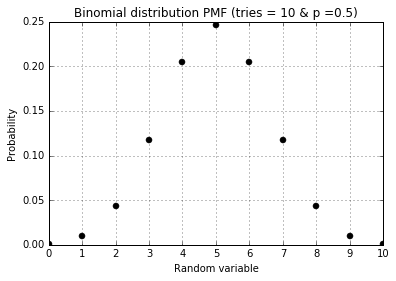

In [35]:
def binom_pmf(n=5, p=0.5):
    # 시도 횟수 0~n
    x = range(n+1) 
    y = stats.binom.pmf(x, n, p)
    plt.plot(x,y,"o", color="black")

    # X축, Y축, 제목
    #plt.axis([-(max(x)-min(x))*0.05, max(x)*1.05, -0.01, max(y)*1.10])
    plt.xticks(x)
    plt.title("Binomial distribution PMF (tries = {0} & p ={1})".format(n,p))
    plt.xlabel("Random variable")
    plt.ylabel("Probability")
    plt.grid()

binom_pmf(10)

# 누적분포함수 
* Cumulative density function (CDF)

In [36]:
stats.norm.cdf(0.0, loc=0.0, scale=1.0)

0.5

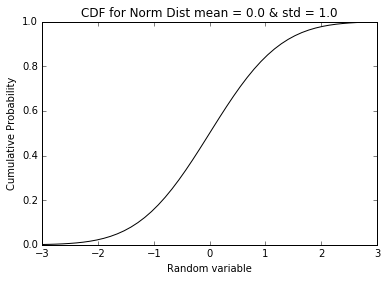

In [38]:
def norm_cdf(mean=0.0, std=1.0):
    # -3σ 와 3σ 범위에, 50개 값에 대한 CDF 값을 얻는다.
    x = sp.linspace(-3*std, 3*std, 50)
    y = stats.norm.cdf(x, loc=mean, scale=std)

    plt.plot(x,y, color="black")
    plt.xlabel("Random variable")
    plt.ylabel("Cumulative Probability")
    plt.title("CDF for Norm Dist mean = {0} & std = {1}".format(mean, std))
    
norm_cdf()